## Live coding: CV Histograms/ transformations and Bitwise ops

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy
%matplotlib inline

In [3]:
img = cv2.imread('./img/tulups.jpg')

In [5]:
def imshow(img):
    plt.figure(figsize=(15,15))
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [10]:
hist_blue=cv2.calcHist([img],[0],None,[255],(0,255))

In [11]:
hist_blue

array([[ 53653.],
       [ 19030.],
       [ 21554.],
       [ 22493.],
       [ 23439.],
       [ 23115.],
       [ 22685.],
       [ 22075.],
       [ 21768.],
       [ 21552.],
       [ 21682.],
       [ 20925.],
       [ 21568.],
       [ 21571.],
       [ 21903.],
       [ 21872.],
       [ 22848.],
       [ 22594.],
       [ 23134.],
       [ 23861.],
       [ 24056.],
       [ 24730.],
       [ 24759.],
       [ 25156.],
       [ 25932.],
       [ 26356.],
       [ 26908.],
       [ 27398.],
       [ 28131.],
       [ 28615.],
       [ 29394.],
       [ 29616.],
       [ 30082.],
       [ 30749.],
       [ 31283.],
       [ 31799.],
       [ 31994.],
       [ 32729.],
       [ 32896.],
       [ 32948.],
       [ 33460.],
       [ 33667.],
       [ 33808.],
       [ 34206.],
       [ 34562.],
       [ 34392.],
       [ 34799.],
       [ 34828.],
       [ 35053.],
       [ 35079.],
       [ 35224.],
       [ 35149.],
       [ 35808.],
       [ 35506.],
       [ 35524.],
       [ 3

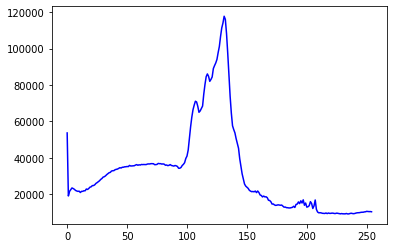

In [12]:
plt.plot(hist_blue,color='b')

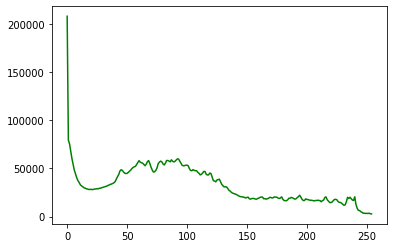

In [13]:
hist_green=cv2.calcHist([img],[1],None,[255],(0,255))
plt.plot(hist_green,color='g')

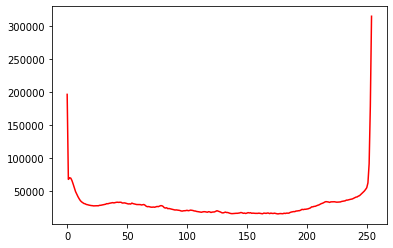

In [14]:
hist_red=cv2.calcHist([img],[2],None,[255],(0,255))
plt.plot(hist_red,color='r')

<function matplotlib.pyplot.show(close=None, block=None)>

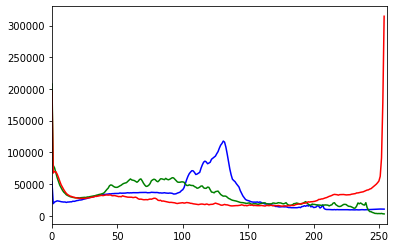

In [21]:
#run later
colors=['b','g','r']
for i,  color in enumerate(colors):
    histogram=cv2.calcHist([img],[i],None,[255],[0,255])
    plt.plot(histogram, color=color)
    plt.xlim(0,256)
plt.show

In [33]:
import numpy as np
translation_matrix=np.float32([
    [1,0,50], #you can the negative values to it
    [0,1,200],   
])

In [24]:
translation_matrix

array([[  1.,   0.,  50.],
       [  0.,   1., 100.]], dtype=float32)

In [91]:
h,w=img.shape[:-1]
h,w

(2160, 3840)

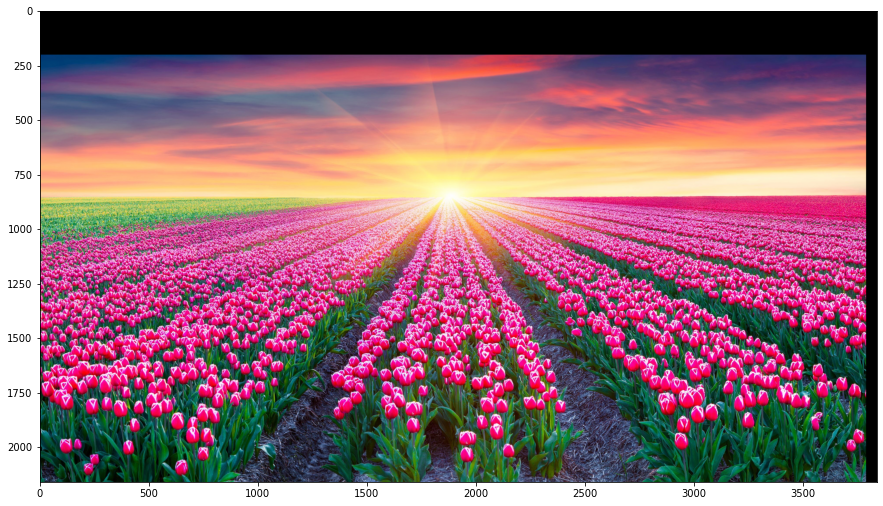

In [34]:
#moving the image
image=cv2.warpAffine(img,translation_matrix,(w,h))
imshow(image)

In [53]:
#rotation
x_center=w//2
y_center=h//2
rotation_matrix=cv2.getRotationMatrix2D((x_center,y_center),
                                       -90,3)
#90 degree, 3 size

In [54]:
rotation_matrix

array([[ 1.8369702e-16, -3.0000000e+00,  5.1600000e+03],
       [ 3.0000000e+00,  1.8369702e-16, -4.6800000e+03]])

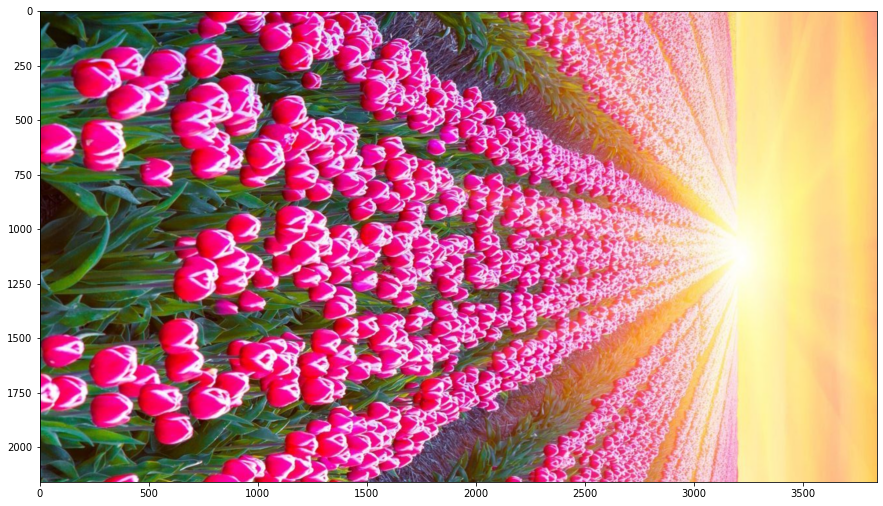

In [55]:
img_rotated=cv2.warpAffine(img,rotation_matrix,(w,h))
imshow(img_rotated)

In [58]:
#image resize
new_width=w//2
new_height=h//2
img_half=cv2.resize(img, (new_width,new_height),
                   interpolation=cv2.INTER_NEAREST)

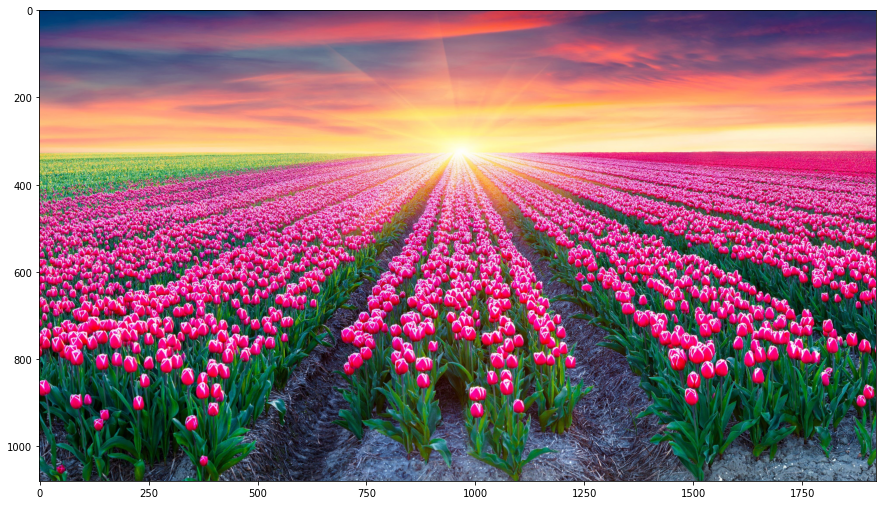

In [59]:
imshow(img_half)

In [ ]:
#inter area less pixelated
#lansoz

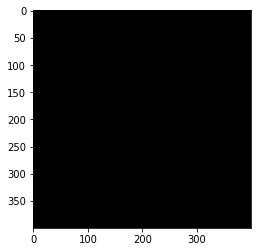

In [93]:
square=np.zeros([400,400])
plt.imshow(square,cmap='gray')

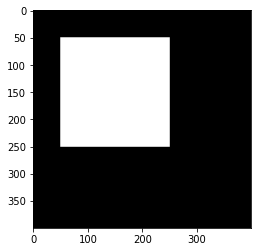

In [94]:
square=square.copy()
cv2.rectangle(square,(50,50),(250,250),255,-1)
plt.imshow(square,cmap='gray')

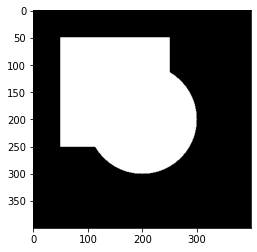

In [96]:
circle=square.copy()
cv2.circle(circle, (200,200),100,255,-1)
plt.imshow(circle,cmap='gray')

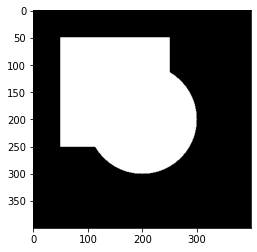

In [98]:
circle=square.copy()
cv2.circle(circle, (200,200),100,255,-1)
plt.imshow(circle,cmap='gray')

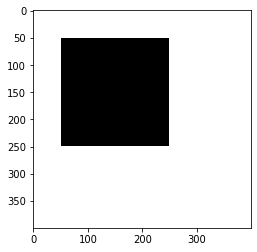

In [99]:
square_negative=cv2.bitwise_not(square)
plt.imshow(square_negative,cmap='gray')

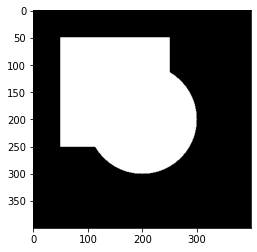

In [100]:
img_or=cv2.bitwise_or(square,circle)
plt.imshow(img_or,cmap='gray')

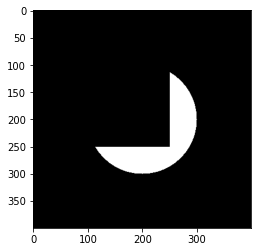

In [101]:
img_xor=cv2.bitwise_xor(square,circle)
plt.imshow(img_xor,cmap='gray')

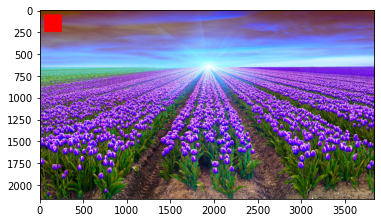

In [92]:
square=square.copy()
cv2.rectangle(square,(50,50),(250,250),255,-1)
plt.imshow(square,cmap='gray')

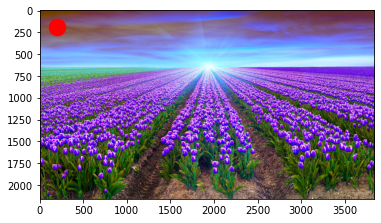

In [64]:
circle=img.copy()
cv2.circle(circle, (200,200),100,255,-1)
plt.imshow(circle,cmap='gray')

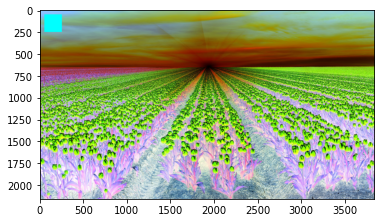

In [65]:
square_negative=cv2.bitwise_not(square)
plt.imshow(square_negative,cmap='gray')

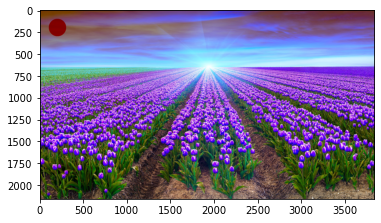

In [66]:
img_and=cv2.bitwise_and(img,circle)
plt.imshow(img_and,cmap='gray')

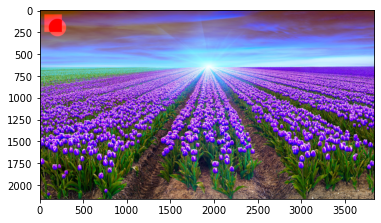

In [70]:
img_or=cv2.bitwise_or(square,circle)
plt.imshow(img_or,cmap='gray')

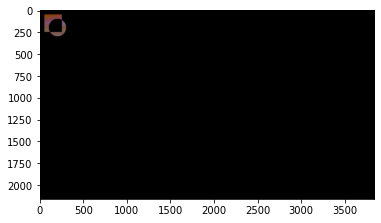

In [69]:
img_xor=cv2.bitwise_xor(square,circle)
plt.imshow(img_xor,cmap='gray')

## Kernels

In [74]:
blur_kernel=np.ones((3,3),np.float32)/9

In [75]:
blur_kernel

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]], dtype=float32)

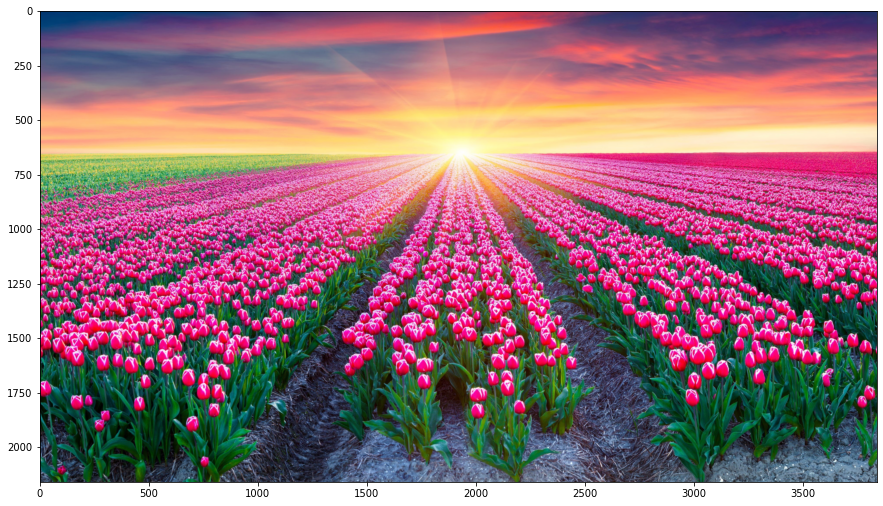

In [78]:
blur_img=cv2.filter2D(img,-1,blur_kernel)
imshow(blur_img)

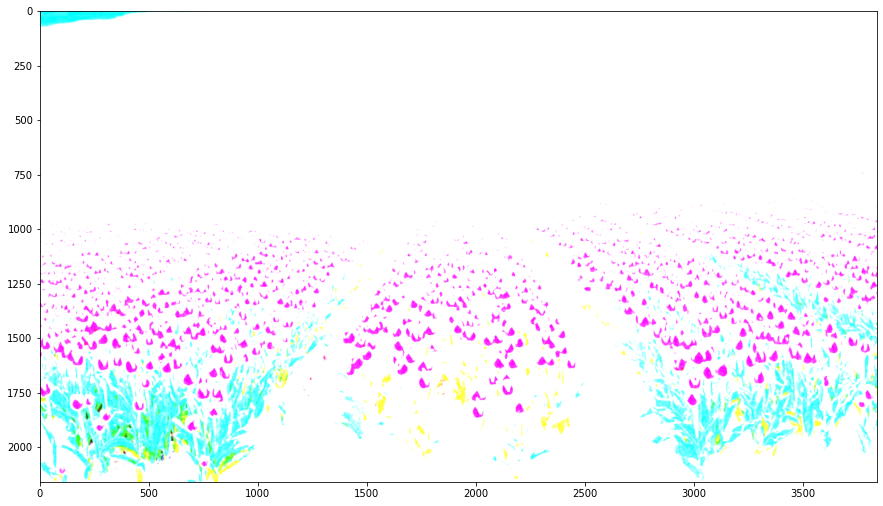

In [86]:
blur_kernel=np.ones((9,9),np.float32)/3
blur_img=cv2.filter2D(img,-1,blur_kernel)
imshow(blur_img)

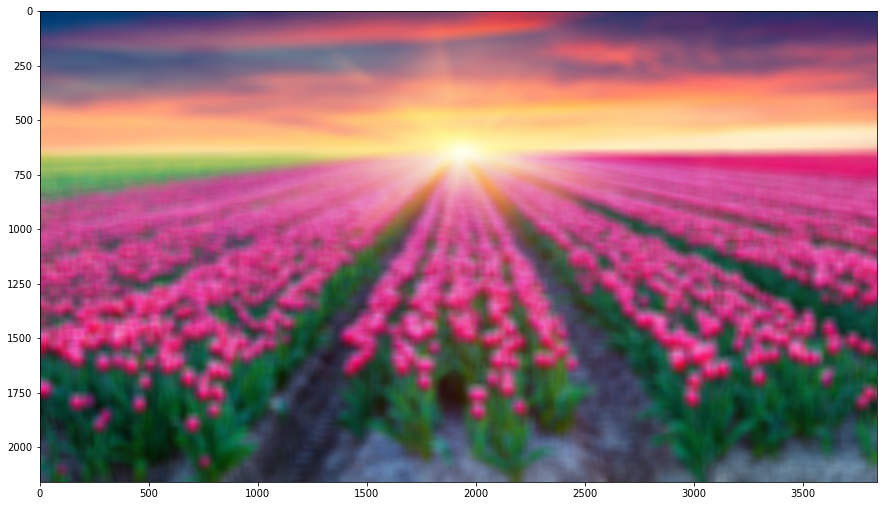

In [6]:
#Automatic bluring
img_blur=cv2.blur(img,(50,50))
imshow(img_blur)

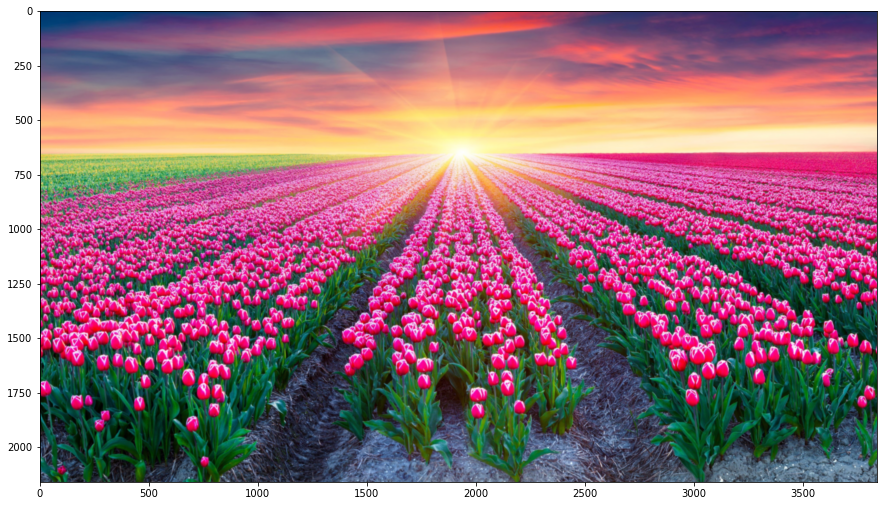

In [10]:
gaussian_blur=cv2.GaussianBlur(img,(9,9),0)
imshow(gaussian_blur)

In [39]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thres_img = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)

In [40]:
ret

128.0

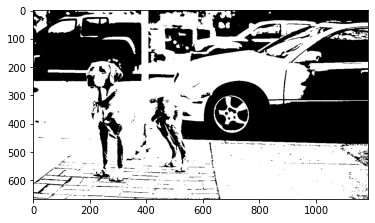

In [41]:
imshow(gray)

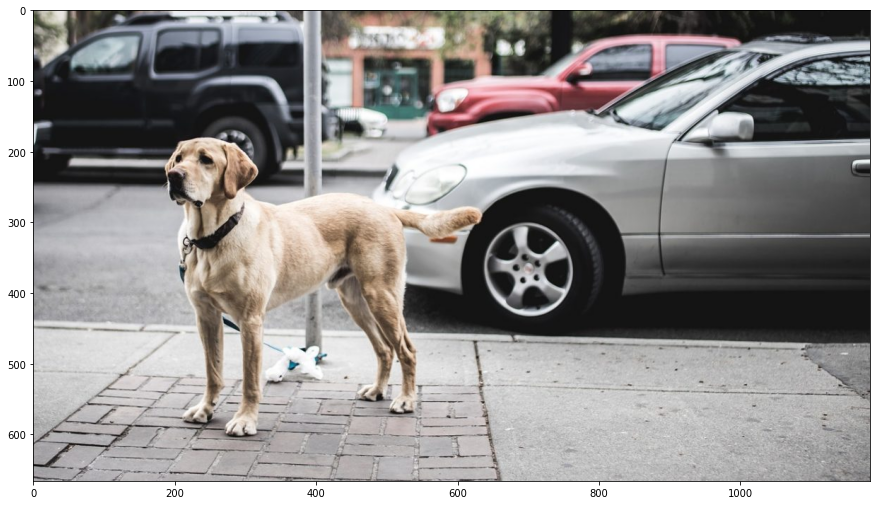

In [43]:

imshow(img)

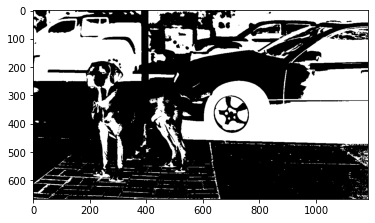

In [47]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, thres_img = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV)
plt.imshow(thres_img, cmap='gray')

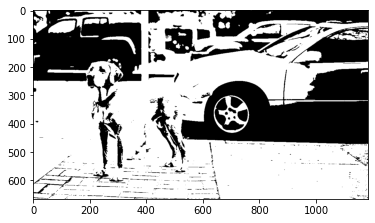

In [50]:
img = cv2.imread('./img/custom.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, thres_img = cv2.threshold(gray, 128, 255, cv2.THRESH_OTSU)
plt.imshow(thres_img, cmap='gray')

In [62]:
img = cv2.imread('./img/custom.jpg')

In [61]:
# Trackbars
threshold_value =128
threshold_type = cv2.THRESH_BINARY

threshold_types = [cv2.THRESH_BINARY, cv2.THRESH_BINARY_INV,
                  cv2.THRESH_TOZERO, cv2.THRESH_TOZERO_INV,
                  cv2.THRESH_TRUNC]

window_name='threshold'


img=img.copy()

gray_img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

cv2.namedWindow(window_name, cv2.WINDOW_AUTOSIZE)

def change_threshold_value(val):
    threshold_value=val
    ret, thresh = cv2.threshold(gray_img,threshold_value,
                                255,threshold_type)
    
    cv2.imshow(window_name, thresh)
    
def change_threshold_type(val):
    threshold_type=threshold_types[val]
    ret, thresh = cv2.threshold(gray_img,threshold_value,
                                255,threshold_type)
                              
    cv2.imshow(window_name, thresh)    
    
    
cv2.createTrackbar('Threshold Value', window_name,
                  threshold_value,255, change_threshold_value)

    
cv2.createTrackbar('Threshold Type', window_name,
                  threshold_type,4, change_threshold_type)

#print('cre')
cv2.imshow(window_name, gray_img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)



-1

In [69]:
#mouse callbacks
window_name = 'mouse callbacks'

img=img.copy()
cv2.namedWindow(window_name)

def draw_square(action, x,y, flags, userdata):
    if (action == cv2.EVENT_LBUTTONUP):
        cv2.rectangle(userdata,(x,y),(x+50, y+50),(0,255,0),-1)
        cv2.imshow(window_name,userdata)
        
    if (action == cv2.EVENT_RBUTTONUP):
        cv2.rectangle(userdata,(x,y),(x+50, y+50),(255,0,0),-1)
        cv2.imshow(window_name,userdata)
        
cv2.setMouseCallback(window_name, draw_square, img)
cv2.imshow(window_name, img)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [ ]:
img=cv2.imread('./img/')